En una encuesta a personas que tienen mascotas, dónde debían destacar las principales
características, se determinó que:
- 55 son juguetones y son muy compañeros.
- 48 son muy compañeros y son inteligentes.
- 120 son juguetones e inteligentes.
- 40 son juguetones, inteligentes y son muy compañeros.

Los datos se recabaron de la siguiente manera:
juguetones = (9, 25, 27, 38, 13, 6, 42)
inteligentes = [10, 8, 38, 42, 13, 27]
compañeros = {'a':27,'b':6, 'c':13, 'd':8, 'e':9,'f':5}

#### Responder:
- a. ¿Cuántas mascotas son inteligentes solamente?
- b. ¿Cuántas mascotas son sólo juguetones?
- c. ¿Cuántas mascotas sólo son muy compañeros?
- d. ¿Cuántas mascotas sólo son juguetones e inteligentes?
- e. ¿Cuántas mascotas sólo son juguetones y son muy compañeros?
- f. ¿Cuántas mascotas sólo son inteligentes y son muy compañeros?
- g. Calcular el conjunto universal

#### A modo de sugerencia se indican los pasos ordenados para la solución:
- 1. declaraciones
- 2. definir funciones de control (opcional) y otras (necesarias)
- 3. convertir en set las estructuras
- 4. Resolver las preguntas y el resto de operaciones para armar el gráfico
- 5. Definir diagrama de Venn, gráfico y respuestas.

In [14]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3, venn3_circles

In [15]:
juguetones = (9, 25, 27, 38, 13, 6, 42)
inteligentes = [10, 8, 38, 42, 13, 27]
compañeros = {'a':27,'b':6, 'c':13, 'd':8, 'e':9,'f':5}

ninguno = 0

#### Funciones útiles

In [16]:
def dict_values_to_list(dictionary):
    dict_list = [x for x in dictionary.values()]
    return dict_list

In [17]:
def get_total(iterable):
    total = 0
    if type(iterable) is dict:
        iterable = dict_values_to_list(iterable)
    for element in iterable:
            total += element
    return total

In [18]:
def to_set(iterable):
    if type(iterable) is dict:
        iterable = set(dict_values_to_list(iterable))
    else:
        iterable = set(iterable)
    return iterable

#### Control

In [19]:
get_total(juguetones)

160

In [20]:
get_total(compañeros)

68

In [21]:
get_total(inteligente)

NameError: name 'inteligente' is not defined

#### Convierto a set

In [22]:
juguetones = to_set(juguetones)
compañeros = to_set(compañeros)
inteligentes = to_set(inteligentes)

#### Respondo las preguntas

In [23]:
juguetones_y_compañeros = juguetones & compañeros
inteligentes_y_compañeros = inteligentes & compañeros
inteligentes_y_juguetones = inteligentes & juguetones
todos = inteligentes & juguetones & compañeros

In [24]:
solo_inteligentes = inteligentes - juguetones - compañeros
solo_juguetones = juguetones - compañeros - inteligentes
solo_compañeros = compañeros - juguetones - inteligentes
solo_inteligentes_y_juguetones = inteligentes_y_juguetones - compañeros
solo_inteligentes_y_compañeros = inteligentes_y_compañeros - juguetones
solo_juguetones_y_compañeros = juguetones_y_compañeros - inteligentes
universal = juguetones | compañeros | inteligentes

In [25]:
print(f'a. ¿Cuántas mascotas son inteligentes solamente? {get_total(solo_inteligentes)}')
print(f'b. ¿Cuántas mascotas son sólo juguetones? {get_total(solo_juguetones)}')
print(f'c. ¿Cuántas mascotas sólo son muy compañeros? {get_total(solo_compañeros)}')
print(f'd. ¿Cuántas mascotas sólo son juguetones e inteligentes? {get_total(inteligentes_y_juguetones)}')
print(f'e. ¿Cuántas mascotas sólo son juguetones y son muy compañeros? {get_total(juguetones_y_compañeros)}')
print(f'f. ¿Cuántas mascotas sólo son inteligentes y son muy compañeros? {get_total(inteligentes_y_compañeros)}')
print(f'g. Calcular el conjunto universal: {universal}')

a. ¿Cuántas mascotas son inteligentes solamente? 10
b. ¿Cuántas mascotas son sólo juguetones? 25
c. ¿Cuántas mascotas sólo son muy compañeros? 5
d. ¿Cuántas mascotas sólo son juguetones e inteligentes? 120
e. ¿Cuántas mascotas sólo son juguetones y son muy compañeros? 55
f. ¿Cuántas mascotas sólo son inteligentes y son muy compañeros? 48
g. Calcular el conjunto universal: {5, 38, 6, 8, 9, 42, 10, 13, 25, 27}


#### Diagrama

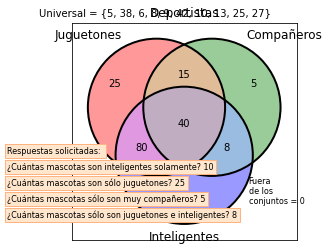

In [26]:
# Totales
total_j = get_total(solo_juguetones)
total_c = get_total(solo_compañeros)
total_i = get_total(solo_inteligentes)
total_ic = get_total(solo_inteligentes_y_compañeros)
total_ij = get_total(solo_inteligentes_y_juguetones)
total_jc = get_total(solo_juguetones_y_compañeros)
total_jci = get_total(todos)
# preparamos la ventana del gráfico
plt.figure('Mascotas')

# dibujamos los diagramas
diagram = venn3((1, 1, 1, 1, 1, 1, 1), set_labels=(
    "Juguetones", "Compañeros", "Inteligentes"))

# establecemos el tamaño de la fuente
for subset in ("111", "110", "101", "100", "011", "010", "001"):
    diagram.get_label_by_id(subset).set_fontsize(10)

# transferimos los resultados de las operaciones
diagram.get_label_by_id('100').set_text(total_j)
diagram.get_label_by_id('010').set_text(total_c)
diagram.get_label_by_id('001').set_text(total_i)
diagram.get_label_by_id('110').set_text(total_jc)
diagram.get_label_by_id('011').set_text(total_ic)
diagram.get_label_by_id('101').set_text(total_ij)
diagram.get_label_by_id('111').set_text(total_jci)

# marcamos los contornos
c = venn3_circles(subsets=(1, 1, 1, 1, 1, 1, 1))

# agregamos más datos aclaratorios al gráfico
plt.text(-0.90, 0.67,      # Texto y cantidad universal
         f"Universal = {universal}",
         size=10)

plt.text(0.40, -0.5,      # Texto fuera del conjunto
         f"Fuera\nde los\nconjuntos = {ninguno}",
         size=8)

# Respondemos las preguntas
plt.text(-1.10, -0.20,
         s="Respuestas solicitadas: ",
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.30,
         s="¿Cuántas mascotas son inteligentes solamente? " + str(total_i),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.40,
         s="¿Cuántas mascotas son sólo juguetones? " + str(total_j),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.50,
         s="¿Cuántas mascotas sólo son muy compañeros? " + str(total_c),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.text(-1.10, -0.60,
         s="¿Cuántas mascotas sólo son juguetones e inteligentes? " + str(total_ic),
         size=8,
         ha="left",  # alineación horizontal
         va="bottom",  # alineación vertical
         bbox=dict(boxstyle="square",  # tipo de cuadro
                   ec=(1.0, 0.7, 0.5),
                   fc=(1.0, 0.9, 0.8),))

plt.axis('on')  # Recuadro
plt.title("Deportistas")
plt.show()

